<a href="https://colab.research.google.com/github/awangberg/Math242_Linear_algebra_code_projects/blob/master/Gram_Schmidt_Process_with_Periodic_Function_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related Youtube Video on a talking piano by Mark Rober - watch before completing the activity:  https://www.youtube.com/watch?v=uBEL3YVzMwk



# Gram-Schmidt Process with Function Spaces

1. Project 1: Polynomial spaces
  1. Choose a "random" basis for polynomials of degree 4 or less on the interval $$ -2 \le t \le 2 $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Go through the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functions in the orthonormal basis.


2. Project 2: Homework for this project:
  1. Choose a "random" basis for periodic functions on the interval $$ -\pi \le t \le \pi $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Do the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functiosn in the orthonormal basis.

In [54]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
from sympy.plotting import plot
import matplotlib.pyplot as plt

# We'll specify that x and t are variables:
x, t = sym.symbols('x, t')

## Project 2: Create an Orthonormal Basis for Periodic Function Spaces

### 1. Choose a "random" basis for periodic functions on the interval 
$$ -\pi \le x \le \pi $$

We'll use a naming convention c# and s#, where # is the number of periods that are repeating in the function.  We'll include sine and cosine functions in pairs.

$$  c0 = cos(0x) = 1 \hspace{1cm}  \hspace{3cm}  $$
$$  c1 = cos(x)  \hspace{1cm} s1 = sin(x) $$
$$  c2 = cos(2x)  \hspace{1cm} s2 = sin(2x) $$
$$     \vdots  \hspace{4cm} \vdots $$
$$  c4 = cos(4x)  \hspace{1cm} s4 = sin(4x) $$

[ We won't include $s0 = sin(0x)$, since this is just the zero function. 

In [55]:
# Our "random" vectors:
c0 = 1
s1 = sym.sin(x)
c1 = sym.cos(x)

###  FILL THESE IN ###



### 2. Create and Scale the inner product (dot product) and norm (magnitude) functions

The inner product that works with the *continuous* functions $f$ and $g$ is

$$ < f | g > \approx \int_{\textrm Left}^{\textrm Right} g(x) f(x) \; dx $$

or

$$ < f | g > = k \int_{\textrm Left}^{\textrm Right} g(x) f(x) \; dx $$

We'll include a scaling factor $k$ for convenience, so that the inner product of the constant function $f(x) = 1$ with itself will be one. That is, we'd like

$$< 1 | 1 >  = 1$$

Since we're working with periodic functions, and $cos(0x) = 1$, we'd like:

$$ < \, cos(0x) \, |\, cos(0x) \, > = 1 $$


#### Determining the scaling constant for the inner product on $P_4$

Find the scaling constant so that the inner product on the constant function $f(x) = 1$ with itself is 1 on the interval 

$$ \pi \le x \le \pi$$

In [107]:
### FIX THIS:
sym.integrate(1*1, (x,-2,2))

2*pi

#### Defining the inner product and norm

Using this factor, we'll define our inner product as a function `ip(f,g)` as 

$$ < \, f \, | \, g \, > = \frac{1}{ ?? } \int_{-\pi}^{\pi} g(x) \, f(x) \; dx $$

The norm, or magnitude, of a vector $f$ will be given by

$$ \left| f \right| = \sqrt{ < \, f \, | \, f \, > }$$

We'll use this to define our norm function `n(f)`.  Because of our scaling factor we should have the norm of the constant function $f(x) = 1$ as $1$.


In [110]:
def ip(a,b):
    return (1/(1))) * sym.integrate(a*b, (x, -2, 2))

def n(a):
    return sym.sqrt(ip(a,a))

#### Testing the scaling constant on the inner product and norm

We'll check that everything works:  

  * Is $< 1 | 1 > = 1$

  * Is $\left| 1 \right| = 1$?

In [111]:
# check that ip(1,1) = 1 and n(1) = 1:
print("Testing that <1|1> is 1, and |1| = 1: ")
print("ip(1,1) = ", ip(1,1))
print("n(1) = ", n(1))


Testing that <1|1> is 1, and |1| = 1: 
ip(1,1) =  1
n(1) =  1


### 3. Perform the Gram-Schmidt process to create an orthonormal basis from the random basis.

We have the *random* basis

$$  c0 = cos(0x) = 1 \hspace{1cm}  \hspace{3cm}  $$
$$  c1 = cos(x)  \hspace{1cm} s1 = sin(x) $$
$$  c2 = cos(2x)  \hspace{1cm} s2 = sin(2x) $$
$$     \vdots  \hspace{4cm} \vdots $$
$$  c4 = cos(4x)  \hspace{1cm} s4 = sin(4x) $$

We'll use code to perform the Gram-Schmidt Orthonormalization Process to generate the nice *orthonormal* basis given by 

$$   uc_0  \hspace{1cm} uc_1 \hspace{1cm} us_1 \hspace{1cm} uc_2 \hspace{1cm} us_2 \hspace{1cm} \cdots \hspace{1cm} uc_4 \hspace{1cm} us_4 $$

This involves four steps:
  1.  Select an unprocessed vector from the random basis
  2.  Find the vector component $t$ perpendicular to the space spanned our existing nice basis vectors by $uc_0, uc_1, us_1, \cdots, uc_{i-1}, us_{i-1}$.  That is, we'll generalize this expression:
$$ T_i = r_i - <\, r_i \, | \, u_1 \, > \, u_1 - <\, r_i \, | \, u_2 \, > \, u_2 - \cdots - <\, r_i \, | \, u_{i-1} \, > \, u_{i-1}$$
for use with our basis vectors.
  3.  Normalized $t$ and set it to $uc_i$ or $us_i$, if it is non-zero:
  $$ uc_i = \frac{1}{\left| t \right|} t  \hspace{.5cm} \textrm{ or }  \hspace{.5cm} us_i = \frac{1}{\left| t \right| } t \hspace{.5cm} \textrm{ if $T_i \ne \vec{0}$ }$$
  4.  Test that our new vector has norm $1$ and is orthogonal to the previous vectors in the orthonormal basis.  That is, perform this but use our basis vectors $uc0, uc1, us1, \cdots$:
  $$ \textrm{ Check: } \left| u_i \right| = 1 \textrm{ and } < \, u_i \, | \, u_1 \, > = 0, \cdots, < \, u_i \, | \, u_{i-1} \, > = 0$$

#### Find the first vector $uc_0$, and do sanity checks

In [112]:
# Find the orthogonal part to existing nice basis:
t0 = c0
print("t0 = ", t0)

t0 =  1


In [113]:
# Normalize:
print("|t0| = ", n(t0))
uc0 = (1/n(t0))*t0
print("uc0 = ", uc0)

|t0| =  1
uc0 =  1


In [114]:
# Check that uc0 has size 1 and is orthogonal to prior ui's:
print("Check:  The size of uc0 is ", n(uc0))
#print("Check:  The inner product of u0 and ... is ", ip(uc0,uc0))

Check:  The size of uc0 is  1


#### Process $c1 = cos(x)$ and do sanity checks.

In [115]:
# Find the orthogonal part to the existing u_i's:
tc1 = c1 - ip(c1, uc0)*uc0
print("tc1 = ", tc1)

tc1 =  cos(x)


In [116]:
#Normalize
print("|tc1| = ", n(tc1))
uc1 = (1/n(tc1))*tc1
print("uc1 = ", uc1)
#print("uc1 = ", sym.simplify(uc1))

|tc1| =  sqrt(2)/2
uc1 =  sqrt(2)*cos(x)


In [117]:
# Sanity Check:  Check that uc1 has size 1 and is orthogonal to prior u's:
print("Check:  The size of uc1 is: ", n(uc1))
#print("Check:  The size of uc1 is: ", sym.simplify(n(uc1)))
print("Check:  The inner product of uc1 and uc0 is: ", ip(uc1,uc0))

Check:  The size of uc1 is:  1
Check:  The inner product of uc1 and uc0 is:  0


#### Process $s1 = sin(x)$ and do sanity checks

In [118]:
#  Now, do the same steps above for sin(1x):
# Find the orthogonal part to the existing nice orthogonal basis:
ts1 = s1 - ip(s1, uc0)*uc0 - ip(s1, uc1)*uc1
print("ts1 = ", ts1)
# Normalize:
print("|ts1| = ", n(ts1))
# Form the new orthogonal vector:
us1 = (1/n(ts1))*ts1
print("us1 = ", us1)

ts1 =  sin(x)
|ts1| =  sqrt(2)/2
us1 =  sqrt(2)*sin(x)


In [119]:
# Sanity Check:  Check that us1 has size 1 and is orthogonal to prior u's:
print("Check:  The size of us1 is: ", n(us1))
print("Check:  The inner product of us1 and uc0 is: ", ip(us1,uc0))
print("Check:  The inner product of us1 and uc1 is: ", ip(us1,uc1))

Check:  The size of us1 is:  1
Check:  The inner product of us1 and uc0 is:  0
Check:  The inner product of us1 and uc1 is:  0


#### Process $c2, s2, c3, s3, c4, $ and $s4$ in order to find $uc2, us2, uc3, us3, uc4, $ and $us4$:

#### Find uc_2, and do sanity checks

#### Find us_2, and do sanity checks

#### FInd $uc_3$ and do sanity checks

#### Find $us_3$ and do sanity checks

#### Find $uc_4$ and do sanity checks

#### FInd $us_4$ and do sanity checks

### Express various functions in the orthonormal basis.

In [104]:
sym.pi

pi

0th approximation to  x + 2*cos(x)  is:  0


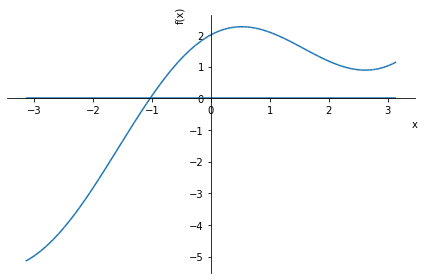

1st approximation to  x + 2*cos(x)  is:  2*sin(x) + sqrt(2)*(sqrt(2)*(-1 + pi) - sqrt(2)*(-pi - 1))*cos(x)/(2*pi)


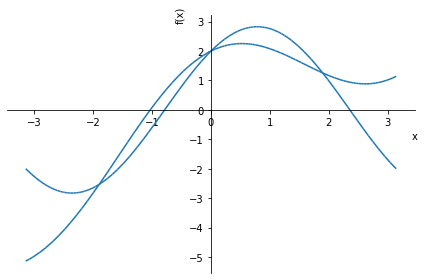

2nd approximation to  x + 2*cos(x)  is:  2*sin(x) + sqrt(2)*(-sqrt(2)*(4/3 + pi/2) + sqrt(2)*(4/3 - pi/2))*sin(2*x)/(2*pi) + sqrt(2)*(sqrt(2)*(-1 + pi) - sqrt(2)*(-pi - 1))*cos(x)/(2*pi)


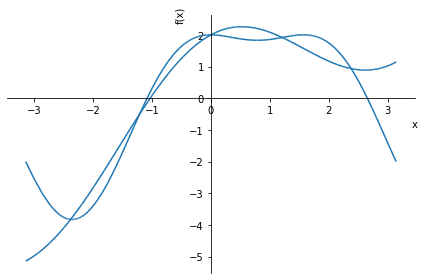

3rd approximation to  x + 2*cos(x)  is:  sqrt(2)*(sqrt(2)*(-1 + pi) - sqrt(2)*(-pi - 1))*sin(x)/(2*pi) + sqrt(2)*(-sqrt(2)*(4/3 + pi/2) + sqrt(2)*(4/3 - pi/2))*sin(2*x)/(2*pi) + sqrt(2)*(sqrt(2)*(-3/4 + pi/3) - sqrt(2)*(-pi/3 - 3/4))*sin(3*x)/(2*pi) + sqrt(2)*(sqrt(2)*(-1 + pi) - sqrt(2)*(-pi - 1))*cos(x)/(2*pi)


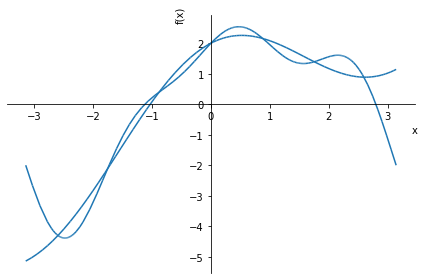

4th approximation to  x + 2*cos(x)  is:  2*sin(x) + sqrt(2)*(-sqrt(2)*(4/3 + pi/2) + sqrt(2)*(4/3 - pi/2))*sin(2*x)/(2*pi) + sqrt(2)*(sqrt(2)*(-3/4 + pi/3) - sqrt(2)*(-pi/3 - 3/4))*sin(3*x)/(2*pi) + sqrt(2)*(-sqrt(2)*(8/15 + pi/4) + sqrt(2)*(8/15 - pi/4))*sin(4*x)/(2*pi) + sqrt(2)*(sqrt(2)*(-1 + pi) - sqrt(2)*(-pi - 1))*cos(x)/(2*pi)


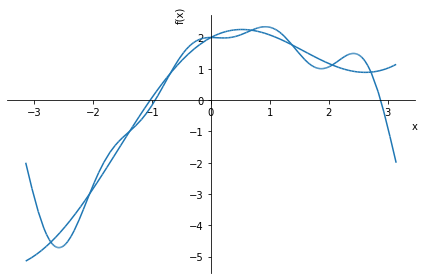

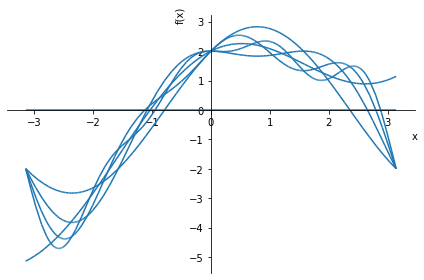

In [125]:
pp = 2*sym.cos(x) + x
pp0 = ip(pp,uc0)*uc0 
print("0th approximation to ", pp , " is: ", pp0)
plot(pp, pp0, (x,-sym.pi,sym.pi))
pp1 = ip(pp,uc0)*uc0 + ip(pp,uc1)*uc1 + ip(pp,us1)*us1 
print("1st approximation to ", pp , " is: ", pp1)
plot(pp, pp1, (x,-sym.pi,sym.pi))
pp2 = ip(pp,uc0)*uc0 + ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2 + ip(pp,us2)*us2  
print("2nd approximation to ", pp , " is: ", pp2)
plot(pp, pp2, (x,-sym.pi,sym.pi))
pp3 = ip(pp,uc0)*uc0 + ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2 + ip(pp,us2)*us2 + ip(pp,uc3)*uc3 + ip(pp,us3)*us3  
print("3rd approximation to ", pp , " is: ", pp3)
plot(pp, pp3, (x,-sym.pi,sym.pi))
pp4 = ip(pp,uc0)*uc0 + ip(pp,uc1)*uc1 + ip(pp,us1)*us1 + ip(pp,uc2)*uc2 + ip(pp,us2)*us2 + ip(pp,uc3)*uc3 + ip(pp,us3)*us3 + ip(pp,uc4)*uc4 + ip(pp,us4)*us4  
print("4th approximation to ", pp , " is: ", pp4)
plot(pp, pp4, (x,-sym.pi,sym.pi))
#plot all of them:
plot(pp, pp0, pp1, pp2, pp3, pp4, (x,-sym.pi,sym.pi))


In [95]:
qq = sym.exp(x)
qq0 = ip(qq,w0)*w0 
print("0th approximation to ", qq , " is: ", qq0)
plot(qq, qq0)
#qq1 = ip(qq,u0)*u0 + ip(qq,u1)*u1
#print("1st approximation to ", qq , " is: ", qq1)
#plot(qq, qq1)
#qq2 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2
#print("2nd approximation to ", qq , " is: ", qq2)
#plot(qq, qq2)
#qq3 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2 + ip(qq,u3)*u3 
#print("3rd approximation to ", qq , " is: ", qq3)
#plot(qq, qq3)
#qq4 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2 + ip(qq,u3)*u3 + ip(qq,u4)*u4
#print("4th approximation to ", qq , " is: ", qq4)
#plot(qq, qq4)
#plot all of them:
#plot(qq, qq0, qq1, qq2, qq3, qq4, (x,-2,2))

NameError: ignored

In [ ]:
cc = 3sym.cos(x)
cc0 = ip(cc,w0)*w0 
print("0th approximation to ", cc , " is: ", cc0)
plot(cc, cc0)
#cc1 = ip(cc,u0)*u0 + ip(cc,u1)*u1
#print("1st approximation to ", cc , " is: ", cc1)
#plot(cc, cc1)
#cc2 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2
#print("2nd approximation to ", cc , " is: ", cc2)
#plot(cc, cc2)
#cc3 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2 + ip(cc,u3)*u3 
#print("3rd approximation to ", cc , " is: ", cc3)
#plot(cc, cc3)
#cc4 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2 + ip(cc,u3)*u3 + ip(cc,u4)*u4
#print("4th approximation to ", cc , " is: ", cc4)
#plot(cc, cc4)
#plot all of them:
#plot(cc, cc0, cc1, cc2, cc3, cc4, (x,-2,2))


In [122]:
uc0 = 1
us1 = sym.sqrt(2)*sym.sin(x)
uc1 = sym.sqrt(2)*sym.cos(x)
us2 = sym.sqrt(2)*sym.sin(2*x)
uc2 = sym.sqrt(2)*sym.cos(2*x)
us3 = sym.sqrt(2)*sym.sin(3*x)
uc3 = sym.sqrt(2)*sym.cos(3*x)
us4 = sym.sqrt(2)*sym.sin(4*x)
uc4 = sym.sqrt(2)*sym.cos(4*x)

In [121]:
sym.sqrt(2)

sqrt(2)